# Natural Computing

## Exercises on Evolutionary Computation

In [1]:
import tsplib95 # pip install tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from operator import itemgetter
%matplotlib inline

### Exercise 6

In [2]:
tsp_problem_path = 'data/berlin52.tsp'
tsp_solution_path = 'data/berlin52.opt.tour'

In [3]:
# TSP problem information
problem = tsplib95.load_problem(tsp_problem_path)
print("--- TSP problem information ---")
print("Name: ", problem.name)
print("Comment: ", problem.comment)
print("Dimension: ", problem.dimension)
print("Edge weight type: ", problem.edge_weight_type)

--- TSP problem information ---
Name:  berlin52
Comment:  52 locations in Berlin (Groetschel)
Dimension:  52
Edge weight type:  EUC_2D


In [4]:
solution = tsplib95.load_solution(tsp_solution_path)
print("Optimal solution: ", problem.trace_tours(solution)[0])

Optimal solution:  7542


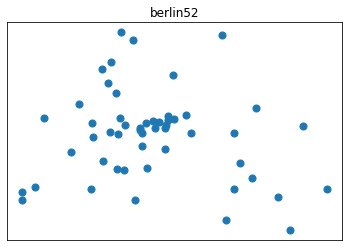

In [5]:
# Visualize TSP without edges
nx.draw_networkx_nodes(problem.get_graph(), problem.node_coords, node_size=50)
plt.title(f"{problem.name}")
plt.show()

#### Simple EA for TSP:
- Random initialization of the population
- Binary tournament selection (results in mating pool)
- Generational gap replacement strategy (10% elitism: 10% of worst offspring replaced by best current parents)
- Fixed size population

In [6]:
# Fitness function
def total_distance(tour, problem):
    total_dist = 0
    for i in np.arange(len(tour)-1):
        a, b = tour[i], tour[i+1]
        dist = problem.wfunc(a, b)
        total_dist += dist
    return total_dist

In [7]:
# Binary tournament selection
def tournament(population):
    participants = random.sample(population, 2)
    winner = min(participants, key=itemgetter(1))
    return winner

In [8]:
# Get best and worst tour, and average tour distance in population
def population_stats(population):
    best = min(population, key=itemgetter(1))
    worst = max(population, key=itemgetter(1))
    avg = np.mean([tour[1] for tour in population])
    return best, worst, avg

In [9]:
# List of tuples representing edges for plotting
def get_edge_list(tour):
    edge_list = []
    for i in np.arange(len(tour)-1):
        a, b = tour[i], tour[i+1]
        edge_list.append( (a, b) )
    return edge_list

In [10]:
# Plot tour including performance
def plot_tour(tour, distance, problem):
    edge_list = get_edge_list(tour)
    nx.draw(problem.get_graph(), pos=problem.node_coords, edgelist=edge_list, node_size=50)
    plt.title(f"{problem.name} ({distance})")
    plt.show()

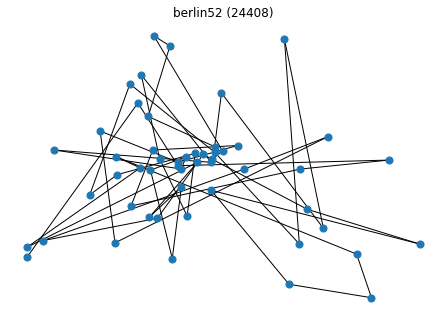

Best:  24408
Worst:  32356
Average:  29071.4


In [11]:
# Random initialization of population
nodes = list(problem.get_nodes())
size = 100 # population size

population = [np.random.permutation(nodes) for i in np.arange(size)]
population = [(tour, total_distance(tour, problem)) for tour in population] # tuple(tour, distance)

best, worst, avg = population_stats(population)
plot_tour(best[0], best[1], problem) # best tour in initial population
print("Best: ", best[1])
print("Worst: ", worst[1])
print("Average: ", avg)

In [13]:
iters = 1 # increase when EA is completely implemented
for t in np.arange(iters):
    new_population = []
    mating_pool = [tournament(population) for _ in np.arange(size)]
    while mating_pool:
        # randomly choose two individuals
        idx = random.sample(range(len(mating_pool)), 2)
        # pop largest index first
        idx.sort(reverse=True) 
        p1 = mating_pool.pop(idx[0]) # parent 1
        p2 = mating_pool.pop(idx[1]) # parent 2
        # crossover
        # mutation
    # elitism